In [68]:
!pip install langcodes
!pip install langcodes[data]

In [69]:
from google.cloud import vision
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import langcodes

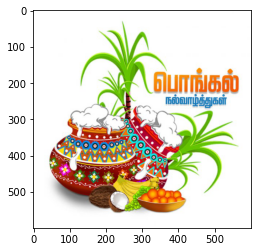

In [70]:
img = cv2.imread("text-image-1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

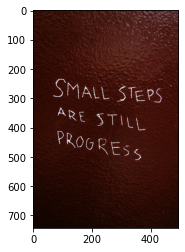

In [71]:
img = cv2.imread("text-image-2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#Photo by @seibelhayley- Unsplash  

In [72]:
!ls ~/.jsonkey/vision-api-sa.json

/home/jupyter/.jsonkey/vision-api-sa.json


In [73]:
# Service account key path
credential_path = "/home/jupyter/.jsonkey/vision-api-sa.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [74]:
print(langcodes.get('ta').language_name())

Tamil


In [75]:
def detect_text(img):
    client = vision.ImageAnnotatorClient()
    response = client.text_detection({'content':img,})
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return response

In [76]:
def plot_text_annotations(imagefile):
    with open(imagefile, 'rb') as image_file:
        content = image_file.read()
    resp = detect_text(content)
    texts = resp.text_annotations
    img = cv2.imread(imagefile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('Identified language: {}'.format(langcodes.get(texts[0].locale).language_name()))
    print('Identified text: {}'.format(texts[0].description))    
    for text in texts[1:]:        
        word = 'Identified word: {}'.format(text.description)
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])
        print(vertices)
        print('text bounds: {}'.format(','.join(vertices)))
        textbounds = eval((','.join(vertices)))  
        cv2.rectangle(img, textbounds[0], textbounds[2], (255,0,255), 2)
    plt.figure(figsize = (10,10))
    plt.title("Identified Language : " + langcodes.get(texts[0].locale).language_name())
    plt.imshow(img)

Identified language: Tamil
Identified text: (பொங்கல்
நல்வாழ்த்துகள்

['(301,165)', '(564,154)', '(567,232)', '(304,243)']
text bounds: (301,165),(564,154),(567,232),(304,243)
['(354,230)', '(539,229)', '(539,268)', '(354,269)']
text bounds: (354,230),(539,229),(539,268),(354,269)


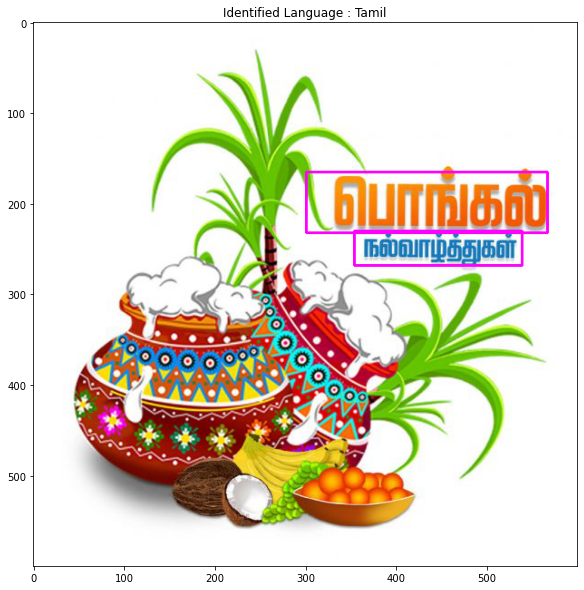

In [77]:
plot_text_annotations('text-image-1.jpg')

Identified language: English
Identified text: SMALL STEPS
ARE STILL
PROGRESS

['(75,233)', '(261,250)', '(256,311)', '(69,294)']
text bounds: (75,233),(261,250),(256,311),(69,294)
['(292,255)', '(439,268)', '(434,324)', '(287,311)']
text bounds: (292,255),(439,268),(434,324),(287,311)
['(89,332)', '(181,345)', '(176,381)', '(84,368)']
text bounds: (89,332),(181,345),(176,381),(84,368)
['(218,348)', '(382,371)', '(376,417)', '(212,395)']
text bounds: (218,348),(382,371),(376,417),(212,395)
['(85,408)', '(374,465)', '(364,516)', '(75,459)']
text bounds: (85,408),(374,465),(364,516),(75,459)


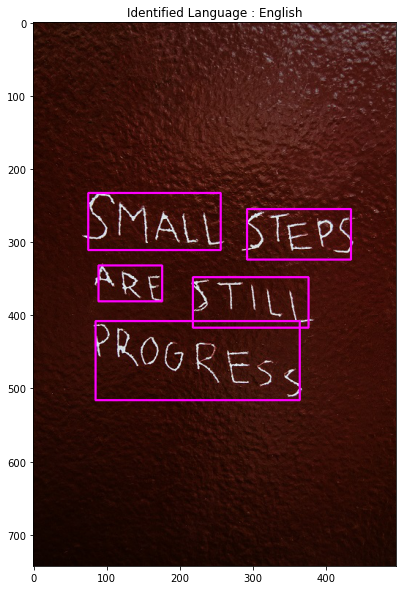

In [78]:
plot_text_annotations('text-image-2.jpg')

Identified language: Korean
Identified text: 진정한 분노 뒤에는
따뜻한 마음이 있다.
뜨거운 사랑이 있기에
분노가 가능하다고 본다.
복수초가
스스로 에너지를 내서
눈을 녹이듯이,
그런 에너지가
분출될 수 있도록
해야 한다.

['(180,145)', '(222,145)', '(222,159)', '(180,159)']
text bounds: (180,145),(222,145),(222,159),(180,159)
['(240,145)', '(267,145)', '(267,158)', '(240,158)']
text bounds: (240,145),(267,145),(267,158),(240,158)
['(285,144)', '(327,144)', '(327,158)', '(285,158)']
text bounds: (285,144),(327,144),(327,158),(285,158)
['(180,184)', '(222,183)', '(222,196)', '(180,197)']
text bounds: (180,184),(222,183),(222,196),(180,197)
['(241,183)', '(267,183)', '(267,196)', '(241,196)']
text bounds: (241,183),(267,183),(267,196),(241,196)
['(271,183)', '(280,183)', '(280,196)', '(271,196)']
text bounds: (271,183),(280,183),(280,196),(271,196)
['(285,179)', '(324,179)', '(324,198)', '(285,198)']
text bounds: (285,179),(324,179),(324,198),(285,198)
['(326,179)', '(330,179)', '(330,197)', '(326,197)']
text bounds: (326,179),(330,179),(330,197),(326,197)
['(227

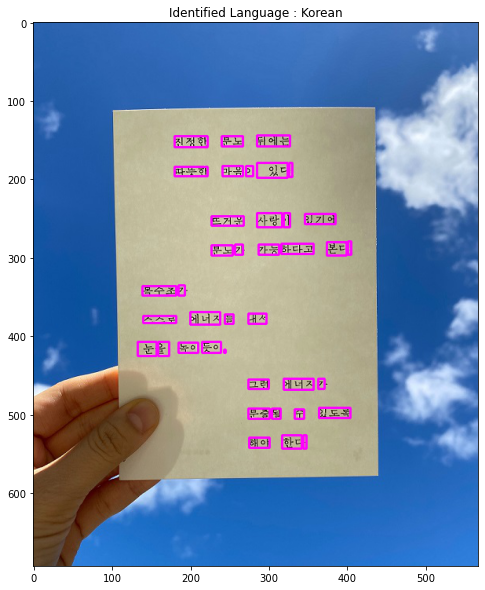

In [79]:
plot_text_annotations('text-image-3.jpg')